In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

import regex as re
from collections import Counter
import nltk


from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv")
df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [31]:
#Check duplicate questions

chk_dupl = df.duplicated(['question_text']).sum() 
print("Number of duplicate questions:",chk_dupl)

Number of duplicate questions: 0


In [39]:
#Check columns with NaN

df.isna().any() 

qid              False
question_text    False
target           False
dtype: bool

###### Observations:
1. No columns with missing values 

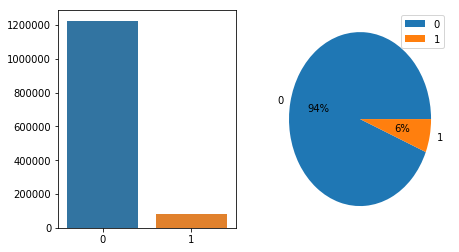

In [32]:
df_trgt = pd.Series(df['target'].value_counts())
#print(df_trgt)

plt.figure(figsize=(7,4))

plt.subplot(1,2,1)
sns.barplot(df_trgt.index,df_trgt.values)


plt.subplot(1,2,2)
plt.pie(df_trgt.values,autopct='%.0f%%',labels=df_trgt.index)
plt.legend()

plt.show()

###### Observations:
1. Highly imbalanced Dataset
2. Has more Sincere labeled questions
3. Has less Insincere data to train model relative to Sincere data
4. Task at hand is more inclined towards finding Insincere questions 

#### Extract top features in Sincere and Insincere Questions

In [6]:
cntvctr0 = CountVectorizer(stop_words='english',strip_accents=ascii)
qtn0s = cntvctr0.fit_transform(df[df['target']==0]['question_text'])
#print(cntvctr0.get_feature_names())
#print("qtn0s.shape:",qtn0s.shape)

qtn0s_sm = np.array(np.sum(qtn0s,axis=0))
#print("qtn0s_sm.shape:",qtn0s_sm.shape)
#print("qtn0s_sm:",qtn0s_sm[0])

qtn0s_idx = np.argsort(qtn0s_sm[0])[::-1]
#print("qtn0s_idx:",qtn0s_idx)


qtn0_ftrs = [cntvctr0.get_feature_names()[i] for i in qtn0s_idx[0:100]]
print("qtn0_top_100_ftrs:",qtn0_ftrs)

qtn0_top_100_ftrs: ['does', 'best', 'like', 'people', 'did', 'good', 'india', 'make', 'time', 'think', 'life', 'use', 'way', 'know', 'work', 'want', 'person', 'better', 'year', 'world', 'feel', 'don', 'job', 'possible', 'new', 'just', 'years', 'mean', 'used', 'start', 'quora', 'need', 'difference', 'different', 'money', 'school', 'long', 'learn', 'business', 'college', 'engineering', 'indian', 'things', 'old', 'really', 'love', 'online', 'country', 'help', 'day', 'book', 'university', 'company', 'using', 'change', '2017', 'high', 'student', 'bad', 'say', 'study', 'buy', 'getting', 'trump', 'having', 'science', 'live', 'happen', 'girl', 'thing', 'stop', 'right', 'free', 'experience', 'going', 'women', 'english', '2018', '10', 'water', 'number', 'important', 'real', 'class', 'computer', 'students', 'ways', 'books', 'doing', 'language', 'look', 'china', 'countries', 'u2019s', 'friend', 'sex', 'come', 'tell', 'career', 'state']


In [8]:
cntvctr1 = CountVectorizer(stop_words='english',strip_accents=ascii)
qtn1s = cntvctr1.fit_transform(df[df['target']==1]['question_text'])
#print(cntvctr1.get_feature_names())
#print("qtn1s.shape:",qtn1s.shape)

qtn1s_sm = np.array(np.sum(qtn1s,axis=0))
#print("qtn1s_sm.shape:",qtn1s_sm.shape)
#print("qtn1s_sm:",qtn1s_sm[0])

qtn1s_idx = np.argsort(qtn1s_sm[0])[::-1]
#print("qtn1s_idx:",qtn1s_idx)


qtn1_ftrs = [cntvctr1.get_feature_names()[i] for i in qtn1s_idx[0:100]]
print("qtn1_top_100_ftrs:",qtn1_ftrs)

qtn1_top_100_ftrs: ['people', 'trump', 'like', 'women', 'does', 'men', 'don', 'did', 'think', 'white', 'muslims', 'quora', 'india', 'indian', 'just', 'americans', 'black', 'sex', 'girls', 'indians', 'world', 'want', 'hate', 'chinese', 'liberals', 'muslim', 'make', 'country', 'american', 'u2019t', 'u2019s', 'america', 'president', 'know', 'feel', 'believe', 'donald', 'jews', 'true', 'say', 'gay', 'really', 'good', 'countries', 'right', 'questions', 'man', 'god', 'old', 'democrats', 'obama', 'china', 'woman', 'racist', 'time', 'government', 'christians', 'year', 'u201d', 'children', 'way', 'stop', 'hindus', 'modi', 'islam', 'bad', 'better', 'israel', 'love', 'doesn', 'stupid', 'isn', 'pakistan', 'usa', 'non', 'girl', 'person', 'come', 'wrong', 'use', 'years', 'north', 'support', 'kill', 'anti', 'life', 'guys', 'look', 'south', 'gun', 'religion', 'states', 'money', 'left', 'hillary', 'going', 'war', 'instead', 'atheists', 'media']


#### Plotting top 50 features

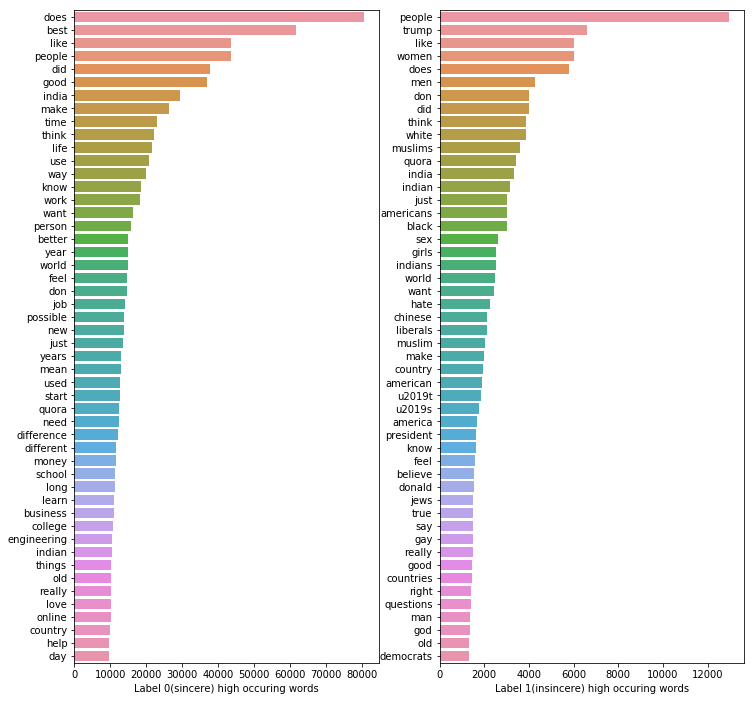

In [38]:
plt.figure(figsize=(12,12))

plt.subplot(1,2,1)
sns.barplot(x=qtn0s_sm[0][qtn0s_idx[0:50]],y=qtn0_ftrs[0:50])
plt.xlabel("Label 0(sincere) high occuring words")


plt.subplot(1,2,2)
sns.barplot(x=qtn1s_sm[0][qtn1s_idx[0:50]],y=qtn1_ftrs[0:50])
plt.xlabel("Label 1(insincere) high occuring words")

plt.show()

#### WordClouds

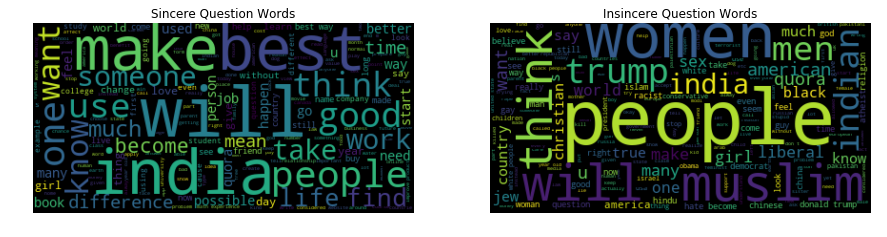

In [17]:
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)

text0 = df[df.target==0]['question_text'].tolist() 
text0 = ' '.join(text0).lower()
wordcloud0 = WordCloud(stopwords = STOPWORDS,collocations=True).generate(text0)

plt.imshow(wordcloud0, interpolation='bilInear')
plt.title("Sincere Question Words")
plt.axis('off')


plt.subplot(1,2,2)

text1 = df[df.target==1]['question_text'].tolist() 
text1 = ' '.join(text1).lower()
wordcloud1 = WordCloud(stopwords = STOPWORDS,collocations=True).generate(text1)

plt.imshow(wordcloud1, interpolation='bilInear')
plt.title("Insincere Question Words")
plt.axis('off')


plt.show()

###### Observations:
1. Top words in Insincere questions are refering to Religions,Race,Country,Community,Person etc
2. There are words appearing in both Sincere and Insincere questions

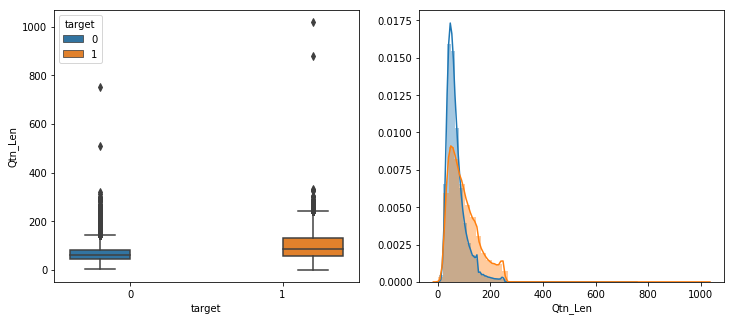

In [54]:
# Qtn Length
df['Qtn_Len'] = df['question_text'].apply(lambda x:len(x))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df['target'],y=df['Qtn_Len'],hue=df['target'])

plt.subplot(1,2,2)
sns.distplot(df[df['target']==0]['Qtn_Len'])
sns.distplot(df[df['target']==1]['Qtn_Len'])

plt.show()

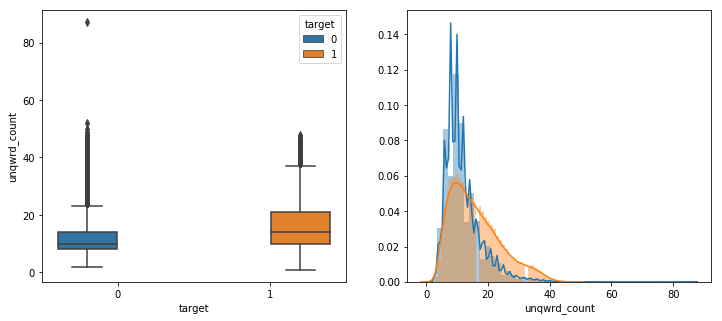

In [55]:
# Unique Words
df['unqwrd_count'] = df['question_text'].apply(lambda x:len(set(x.split(" "))))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df['target'],y=df['unqwrd_count'],hue=df['target'])

plt.subplot(1,2,2)
sns.distplot(df[df['target']==0]['unqwrd_count'])
sns.distplot(df[df['target']==1]['unqwrd_count'])

plt.show()

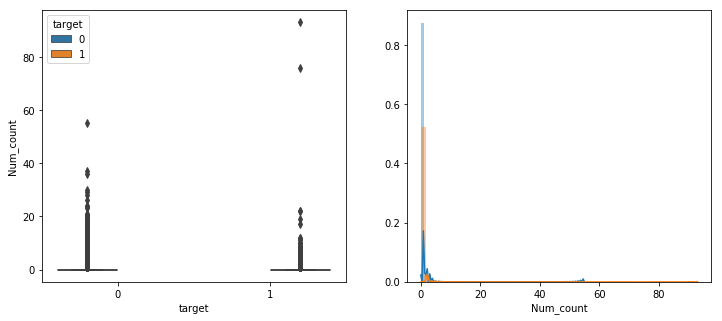

In [56]:
# Number_count
df['Num_count'] = df['question_text'].apply(lambda x:len(re.findall(r'\d+',x)))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df['target'],y=df['Num_count'],hue=df['target'])

plt.subplot(1,2,2)
sns.distplot(df[df['target']==0]['Num_count'])
sns.distplot(df[df['target']==1]['Num_count'])

plt.show()

###### Observations:
1. There are few questions having more than 1 or a couple of numbers
2. There are some questions with larger number count and some of them are labeled insincere
3. Will explore those questions a little more

In [59]:
pd.set_option('display.max_colwidth',-1)
df[['question_text','Num_count','target']][(df['Num_count']>20)]

,question_text,Num_count,target
25249,"How would you continue this sequence: ""1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29""?",28,0
163583,What is [math]\overbrace{\sum_{\vartheta=8}^{\infty} \vec{\frac{\sum_{\kappa=7}^{\infty} \overbrace{1x^0}^{\text{Read carefully.}}-3x^{-1} \div 1x^5+{\sqrt[3]{2x^{-3}}}^{1x^0}+\vec{\vec{{3x^{-3}}^{1x^{-2}}}}}{\sum_{\dagger=9}^{\infty} \vec{\boxed{\boxed{3x^{-1}}+3x^1 \times 1x^{-5}}}}} \div \sin(\boxed{\boxed{\vec{3x^{-5}}}+\sqrt[4]{2x^{-4}}+\vec{2x^{-3}} \div \sin(\sqrt[5]{\int_{1x^5}^{2x^5} 2x^{-3} d\varrho}) \times \vec{{\underbrace{2x^1}_{\text{Prove This.}}}^{3x^4} \div \sqrt[5]{2x^{-3}}+\sum_{\theta=8}^{\infty} 1x^4}}) \times {\boxed{\vec{\sum_{\nu=8}^{\infty} \sum_{4=6}^{\infty} \sum_{\xi=9}^{\infty} \boxed{3x^1}-\boxed{\sqrt[3]{\sqrt[3]{2x^{-2}}}}}}}^{1x^3}-\cos({{\tan(\sum_{0=6}^{\infty} \tan(\overbrace{\frac{\boxed{1x^1}-\sqrt[3]{3x^{-2}}}{\sum_{\eta=10}^{\infty} 1x^{-3} \div 1x^1}}^{\text{Molar Quantity.}}))}^{1x^3}}^{1x^{-4}})}^{\text{Expanded.}}[/math]?,76,1
263089,"Why does the sequence go up by 9 each time when the formula is 1,2,3,4 x 8 , -2, +1,2,3,4 (1x8=8, 8-2=6, 6+1=7) 7, 16, 25, 34, 43, 52, 61, 70, 79, 88?",30,0
279662,"Let us consider the eight real numbers, 2.4, 2.9, 2.9, 2.9, 3, 3.2, 3.2, 3.5. The mean and standard deviation of these 8 numbers are 3 and 0.3 respectively. What percent of the 8 numbers are with 1 standard deviation of the mean?",21,0
331006,"If [math](3+x^{2008}+x^{2009})^{2010} = a_0 + a_1x + a_2x^2 + ..... + a_nx^n [/math], then the value of [math] a_0 - 1/2a_1 -1/2a_2 + a_3 - 1/2a_4 - 1/2a_5 +a_6 + ...... [/math] is ?",23,0
341312,What is the answer to [math]\frac{422}{2262\mid 5501}\int{846}^{}\frac{\Omega}{256}\int{2551\times 5942}^{4366+1736}\frac{993+548}{1491\mid 8813}\int{\int{}^{6x + 35}}^{8613-4985}\frac{5509-2038}{436\mid 5018}\int{\Omega}^{3984\mid 3274}\frac{3211-991}{\int{895-4864}^{517}}\int{406+910}^{\int{8672-6582}^{\mathbb{Z}}}\frac{\int{33x + 17}^{218}}{818\mid 1124}\int{790-6578}^{6575+3181}\frac{\oint{\int{\frac{9455+8322}{\oint{448}^{5013-7921}}}^{3451+756}}^{2181-7743}}{1406-3695}\frac{157}{5426-6986} [/math]?,55,0
354391,What is the optimum firing order for a 4 cylinder engine: 1-3-4-2 or 1-2-4-3 or 1-3-2-4 or 1-4-3-2 or maybe 4-2-3-1 or something else?,21,0
421333,"How do I show that the function [math]f(x_1, x_2, x_3) = \begin {cases} \frac{x_1 x_2 - x_{3}^{2}}{x_{1}^{2}, x_{2}^{2}, x_{3}^{2}} & \text {if $(x_1, x_2, x_3) \neq (0,0,0)$} \\ 0 & \text {if $(x_1, x_2, x_3) = (0,0,0)$} \end {cases}?",26,0
443216,What is [math]\frac{\int_{1x^5}^{3x^{-5}} \tan(\tan({\boxed{\int_{1x^0}^{1x^2} \sum_{\varpi=1}^{\infty} \int_{2x^{-3}}^{2x^2} \sum_{\alpha=7}^{\infty} \underbrace{\sqrt[2]{1x^5}}_{\text{Gauss's Law of Theoretical Probability.}} d\tau dx}}^{1x^0})) d\mu}{\int_{2x^{-3}}^{1x^5} \cos(\int_{2x^2}^{1x^{-3}} \frac{\sqrt[2]{\overbrace{\underbrace{\frac{3x^3+3x^5}{\sqrt[3]{2x^{-3}}}}_{\text{Gauss's Law of Theoretical Probability.}} \times \overbrace{\tan(2x^0)}^{\text{Gauss's Law of Theoretical Probability.}}-\sum_{4=7}^{\infty} \boxed{3x^{-5}}}^{\text{Inverse Function.}}}}{{\boxed{\int_{2x^2}^{2x^4} 3x^1 d9} \div \sum_{6=6}^{\infty} \sqrt[3]{2x^2}+\sqrt[4]{\sin(2x^0+3x^0)}}^{2x^{-4}}+\boxed{\frac{\vec{\boxed{\sum_{\gamma=10}^{\infty} 1x^{-5}}}}{\frac{\sum_{\iota=2}^{\infty} 1x^{-5}-\frac{3x^{-1}}{1x^{-4}}}{\sin(\tan(3x^{-2}))}}}} \times \boxed{\sqrt[2]{{{{\sqrt[5]{2x^5}}^{2x^{-1}}}^{2x^{-1}} \div \sum_{\chi=6}^{\infty} \int_{1x^4}^{2x^{-4}} 3x^2 d\vartheta+{2x^{-3}}^{2x^{-5}}}^{3x^{-4}}}} d\mu) d\iota}[/math]?,93,1
544441,Why can the total number of squares on a 10 by 10 be represented by 1(9^2) +2(8^2) +3(7^2) +4(6^2) +5(5^2) +6(4^2) +7(3^2) +8(2^2) +9 (1^2)?,29,0


###### Observations:
1. Questions with larger Number Count are mostly related to mathematics
2. 4 of these are labeled as 1's , but see no toxicity or insincere nature in it
3. Looks like some of the data is misclassified/ has noise

#### Will continue with further EDA and Featurization process......................